In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [2]:
def population_graph(data,year):
    
    #took data,year args
    data_year = data[[year,"Country or area","Urban Agglomeration"]]

    #creating essential variables for plot graphs and set labels
    categories = data_year.sort_values(by=[year], ascending=False)[:10]["Urban Agglomeration"].reset_index(drop=True)
    values = data_year.sort_values(by=[year], ascending=False)[:10][year].reset_index(drop=True)
    countries = data_year.sort_values(by=[year], ascending=False)[:10]["Country or area"].reset_index(drop=True)
    
    data1 = data.drop(columns=["Country Code","City Code","Note","Latitude","Longitude","Country or area"]).sort_values(by=[year], ascending=False)[:10]
    data2 = data1.set_index("Urban Agglomeration").transpose()
    df = data2["1985":"2030"]
    
    #set style as seaborns
    plt.style.use('seaborn')

    fig = plt.figure(figsize=(20, 12))
    
    #creating 2x2 fig firstly
    gs1 = GridSpec(ncols=2, nrows=2, left=0.05, right=0.5, wspace=0.2, hspace=0.1)

    #creating bar plot horizontally
    ax1 = fig.add_subplot(gs1[0, 0])
    sns.barplot(x=values, y=categories, color='steelblue', ax=ax1)
    ax1.set_xlabel('')
    ax1.set_ylabel('')

    #set scale for x axis values and shows them as "M"
    scale_x = 1e3
    ticks_x = ticker.FuncFormatter(lambda values, pos: '{0:g}'.format(values/scale_x)+"M")
    ax1.xaxis.set_major_formatter(ticks_x)
    ax1.set(yticklabels=[])

    #add category names inside the bars
    for i, v in enumerate(values):

        # Adjusting x and y position of the text annotations
        ax1.text(v-100, i, categories[i], color='black', ha='right', va='bottom', fontsize=10)
        ax1.text(v-100, i, countries[i], color='black', ha='right', va='top', fontsize=7.5)

    #creating pie chart with percentages
    ax2 = fig.add_subplot(gs1[0, 1:])
    ax2.pie(values, labels=categories, autopct='%1.1f%%')

    #creating a new gridspec for the split graphs
    gs2 = GridSpecFromSubplotSpec(10, 1, subplot_spec=gs1[1, 0], hspace=0.3)  
    
    #using enumerate func for creating subplots for every city
    for i,column in enumerate(df.columns):
        ax = fig.add_subplot(gs2[i, 0])
        sns.lineplot(data=df[column], marker='*', markersize=7)
        ax.set_ylabel(column, rotation=0, fontsize=7, ha="left")
        ax.set_yticks([])
        ax.xaxis.label.set_color('white')

        #make x ticks visible for only end of the 10 city graph
        if column == df.columns[-1]:
            ax.set_xticks(range(len(df.index)), range(1985, 2031, 5), color="black")

    # create a new gridspec for the split graphs
    gs3 = GridSpecFromSubplotSpec(10, 1, subplot_spec=gs1[1, 1], hspace=0.3) 
    
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(gs3[i, 0])  # Add a subplot for each column
        sns.lineplot(data=df[column], marker='*', markersize=7)
        ax.set_ylabel(column, rotation=0, fontsize=8, ha="left")
        ax.set_yticks([])
        ax.xaxis.label.set_color('white')

        if column == df.columns[-1]:
            ax.set_xticks(range(len(df.index)))
            ax.set_xticklabels(range(1985, 2031, 5), color="black")

    # Display the plot
    return plt.gca()

C:\Users\Canberk\AppData\Local\Temp\ipykernel_14880\1015962852.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


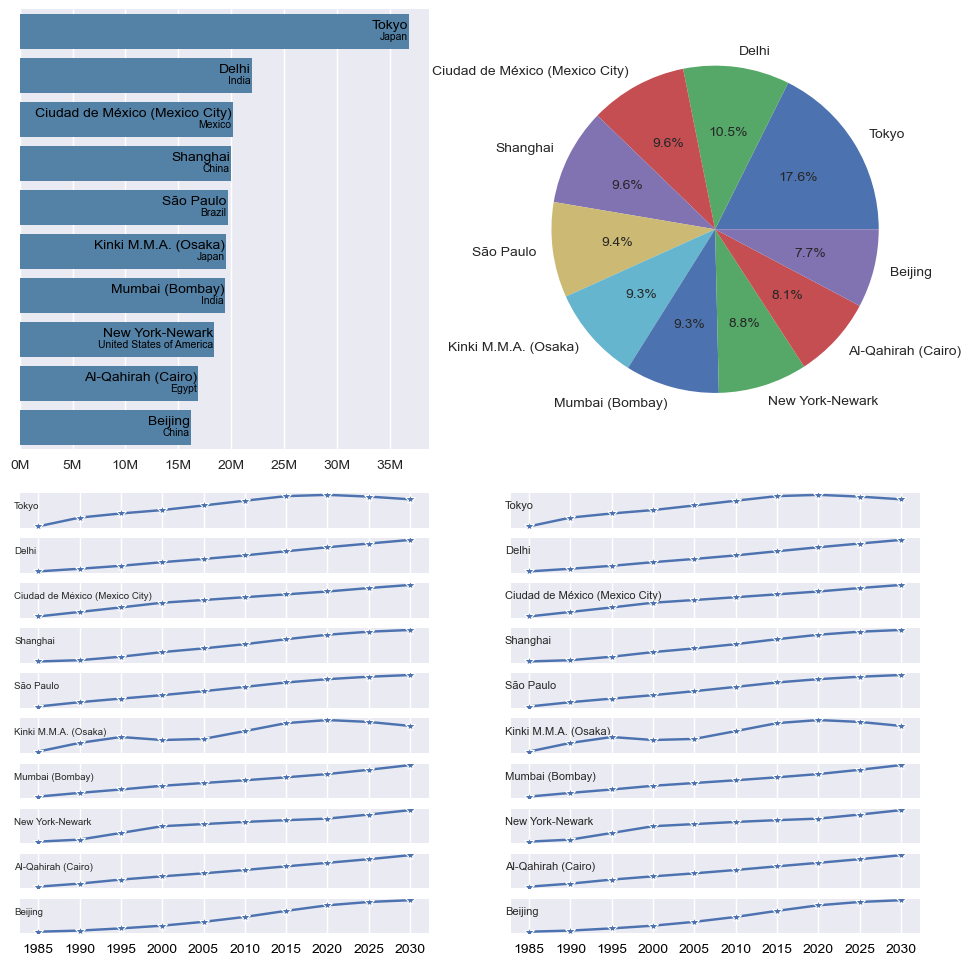

In [3]:
#import data
data = pd.read_excel(r"global-city-population-estimates.xls", sheet_name = 1 )

#set the spesific year
year="2010"

#call the function
graph = population_graph(data,year)

# displays the plot
plt.show()